<a href="https://colab.research.google.com/github/HitenGambhir/DataAnalytics/blob/main/fpl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('viridis')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


df=pd.read_csv('/content/cleaned_merged_seasons.csv')
df.head()


,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,...,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,2016-17,Aaron Cresswell,DEF,NaN,0,0,0,0,0.0,454,...,2.0,0.0,0,0,0,0,55,False,0,1
1,2016-17,Aaron Lennon,MID,NaN,0,0,6,0,0.3,142,...,1.0,0.0,1,0,0,0,60,True,0,1
2,2016-17,Aaron Ramsey,MID,NaN,0,0,5,0,4.9,16,...,3.0,23.0,2,0,0,0,80,True,0,1
3,2016-17,Abdoulaye Doucouré,MID,NaN,0,0,0,0,0.0,482,...,1.0,0.0,0,0,0,0,50,False,0,1
4,2016-17,Adam Forshaw,MID,NaN,0,0,3,0,1.3,286,...,1.0,0.0,1,0,0,0,45,True,1,1


**Using "info" command to see if there Are any Outliers Present**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96169 entries, 0 to 96168
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season_x           96169 non-null  object 
 1   name               96169 non-null  object 
 2   position           96169 non-null  object 
 3   team_x             76317 non-null  object 
 4   assists            96169 non-null  int64  
 5   bonus              96169 non-null  int64  
 6   bps                96169 non-null  int64  
 7   clean_sheets       96169 non-null  int64  
 8   creativity         96169 non-null  float64
 9   element            96169 non-null  int64  
 10  fixture            96169 non-null  int64  
 11  goals_conceded     96169 non-null  int64  
 12  goals_scored       96169 non-null  int64  
 13  ict_index          96169 non-null  float64
 14  influence          96169 non-null  float64
 15  kickoff_time       96169 non-null  object 
 16  minutes            961

**team_x Contains outliers,Hence we must remove corresponding Rows**

In [10]:
df.dropna(subset=['team_x'],inplace=True)


**Now,we must correlate Varous stats which will be used to evaluate your team**

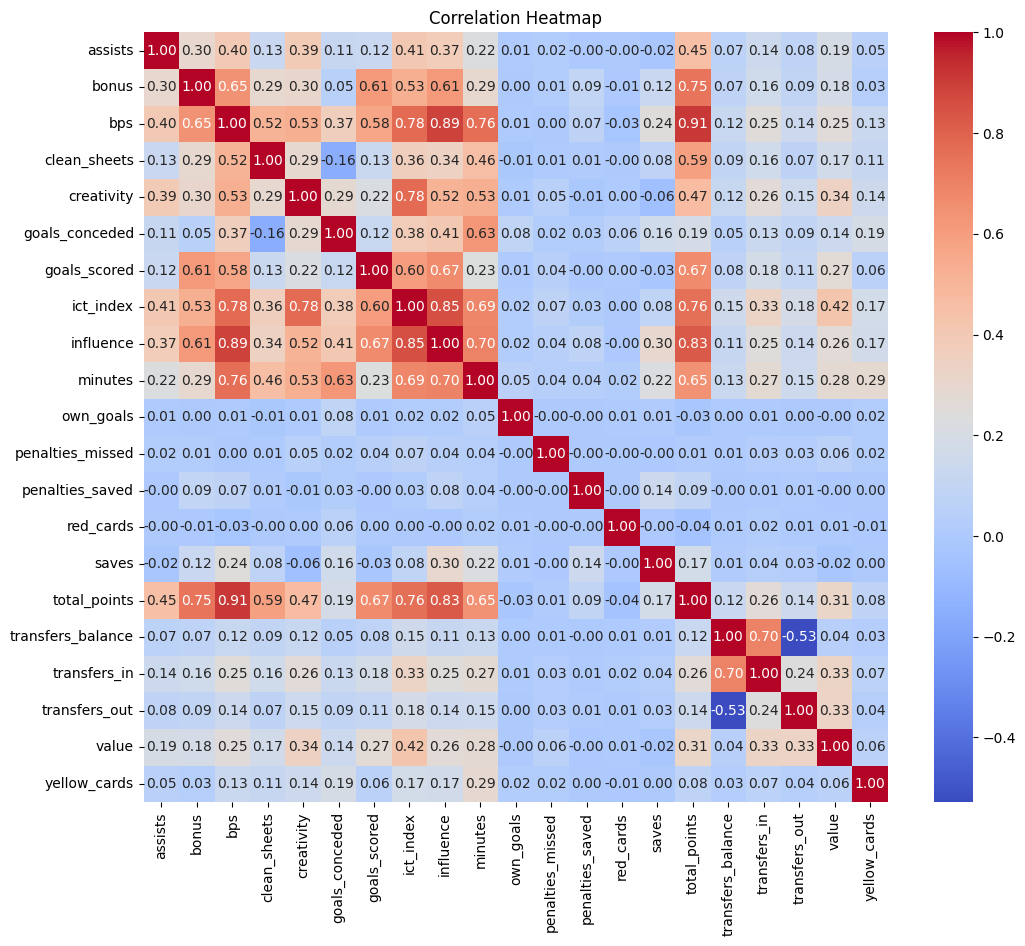

In [11]:
cols = ['assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
                    'goals_conceded', 'goals_scored', 'ict_index', 'influence',
                    'minutes', 'own_goals', 'penalties_missed', 'penalties_saved',
                    'red_cards', 'saves', 'total_points', 'transfers_balance',
                    'transfers_in', 'transfers_out', 'value', 'yellow_cards']
sub_df = df[cols]

corr_matrix = sub_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

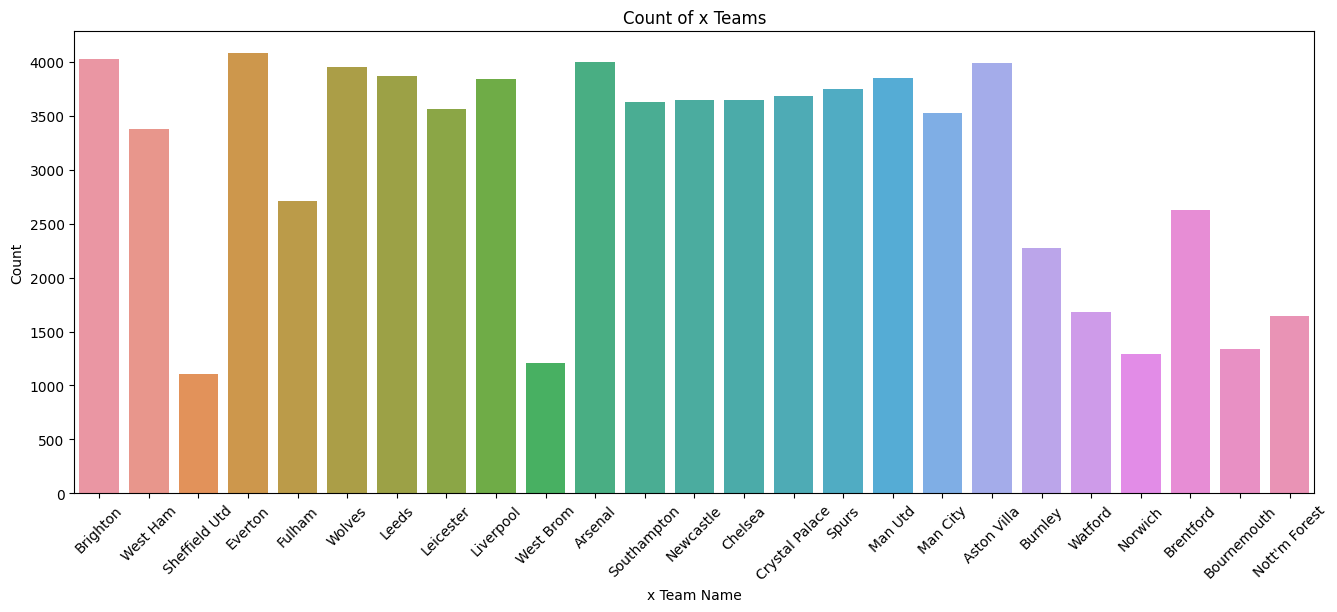

In [12]:
plt.figure(figsize=(16, 6))

sns.countplot(data=df, x='team_x')
plt.xticks(rotation=45)
plt.xlabel('x Team Name')
plt.ylabel('Count')
plt.title('Count of x Teams')
plt.show()


**Now ,to Evaluate Teams on Total points taken by each team**

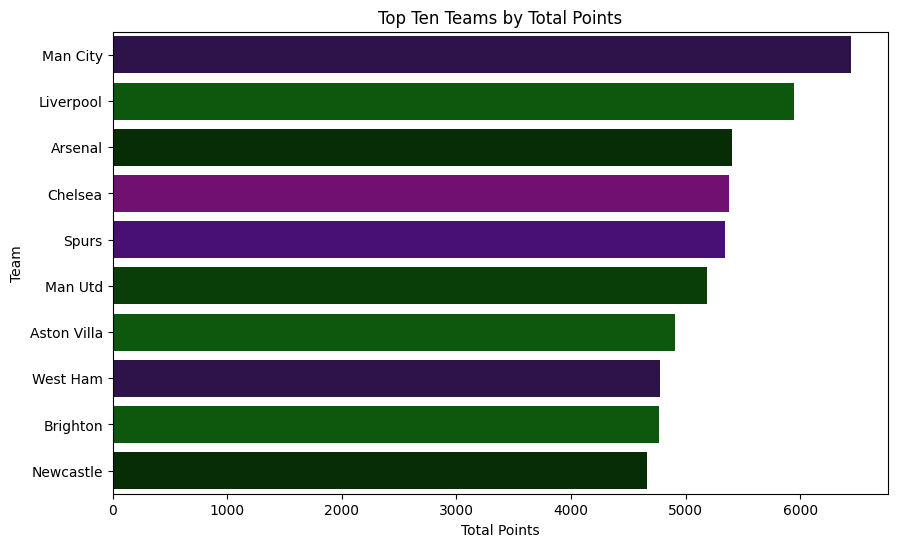

In [13]:
team_total_points = df.groupby('team_x')['total_points'].sum().reset_index()
teams = team_total_points.sort_values(by='total_points', ascending=False)
top_ten = teams.head(10)
custom_palette = [
    "#2E0854",
    "#006400",
    "#003300",
    "#800080",
    "#4B0082",
    "#004700",
    "#006400",
]

'''    "#006400",  # Dark Green
    "#004700",  # Dark Green (Darker)
    "#003300",  # Dark Green (Darkest)'''
plt.figure(figsize=(10, 6))
sns.barplot(data=top_ten, x='total_points', y='team_x', palette=custom_palette)

plt.xlabel('Total Points')
plt.ylabel('Team')
plt.title('Top Ten Teams by Total Points')
plt.show()

**To Evaluate the player based on postion the Play**

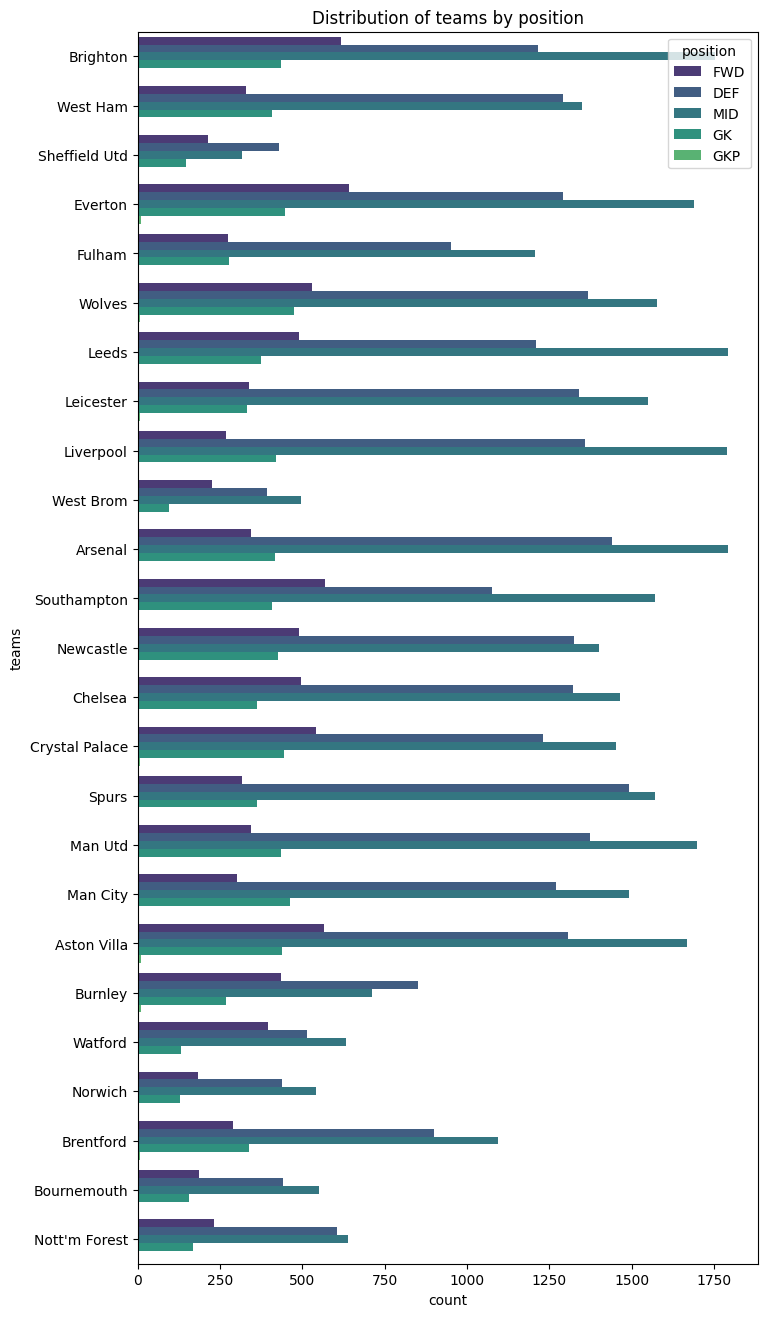

In [14]:
plt.figure(figsize=(8,16))

sns.countplot(data =df,y = "team_x", hue="position")

plt.title("Distribution of teams by position")
plt.xlabel("count")
plt.ylabel("teams")
plt.legend(title="position", loc="upper right")
plt.show()

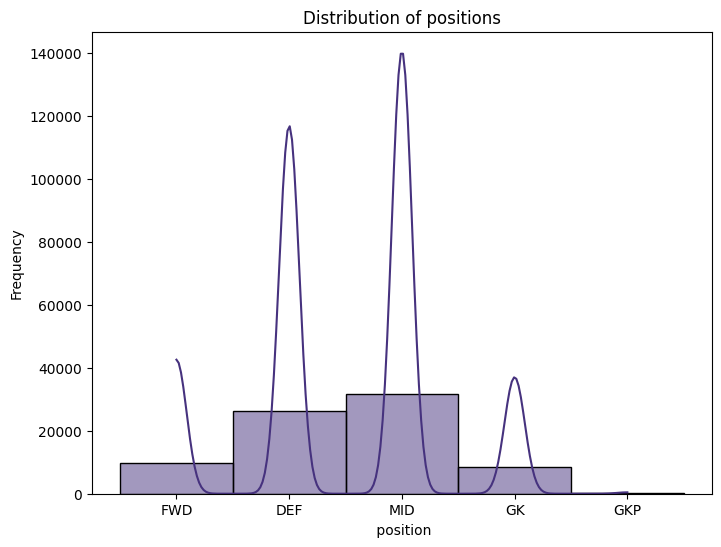

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='position', bins=5, kde=True)
plt.xlabel(' position')
plt.ylabel('Frequency')
plt.title('Distribution of positions')
plt.show()

**Total points over all 38 Gameweeks**

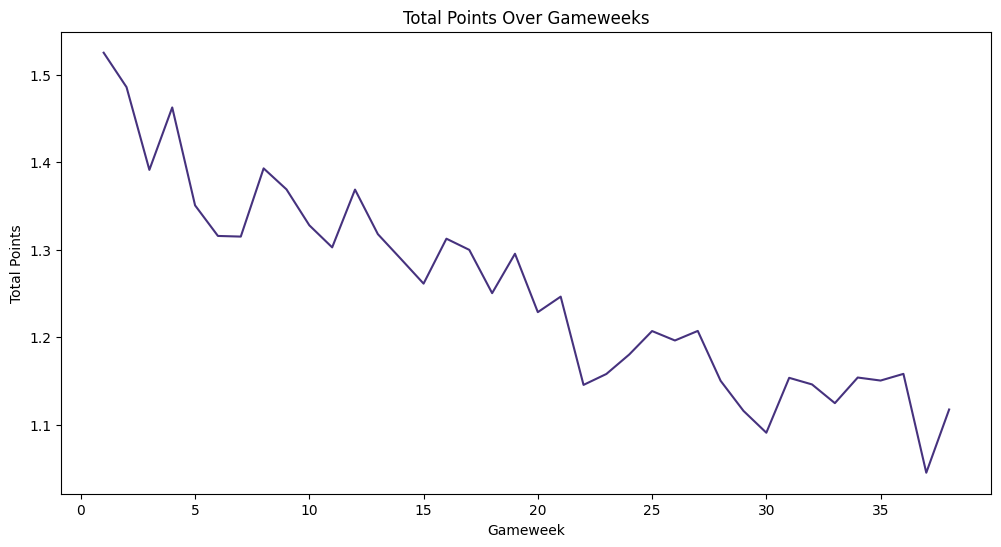

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='GW', y='total_points', ci=None)
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.title('Total Points Over Gameweeks')
plt.show()

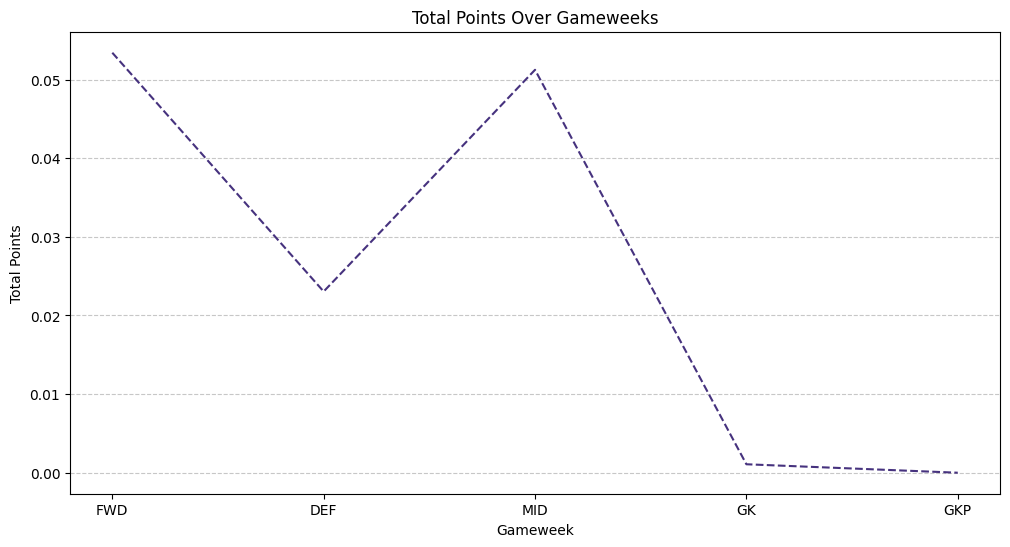

In [17]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='position', y='assists', ci=None,  linestyle='--')
plt.xlabel('Gameweek')
plt.ylabel('Total Points')
plt.title('Total Points Over Gameweeks')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Now,to eavaluate total points on the threats**

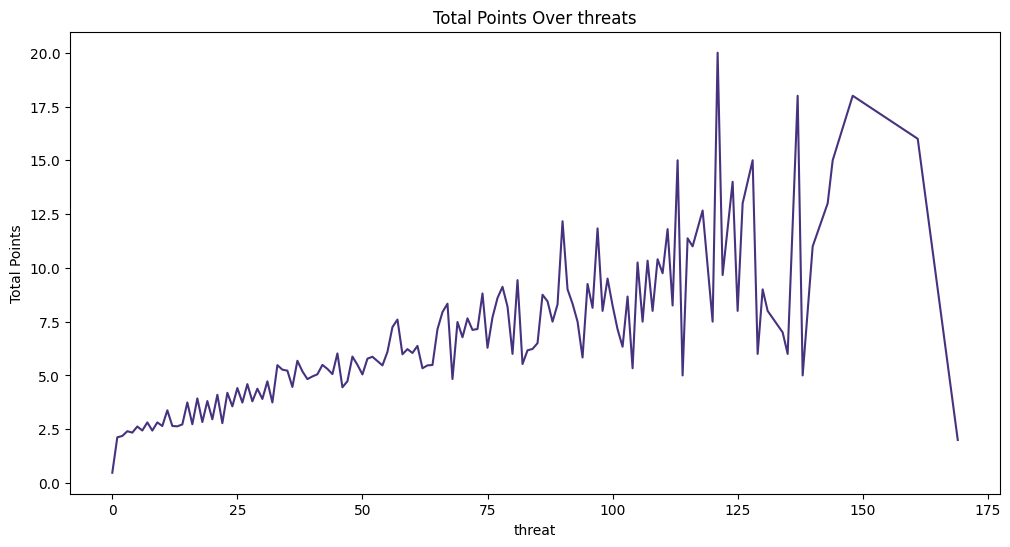

In [18]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='threat', y='total_points', ci=None)
plt.xlabel('threat')
plt.ylabel('Total Points')
plt.title('Total Points Over threats')
plt.show()

**Also,Must consider based on the Bonus Point System**

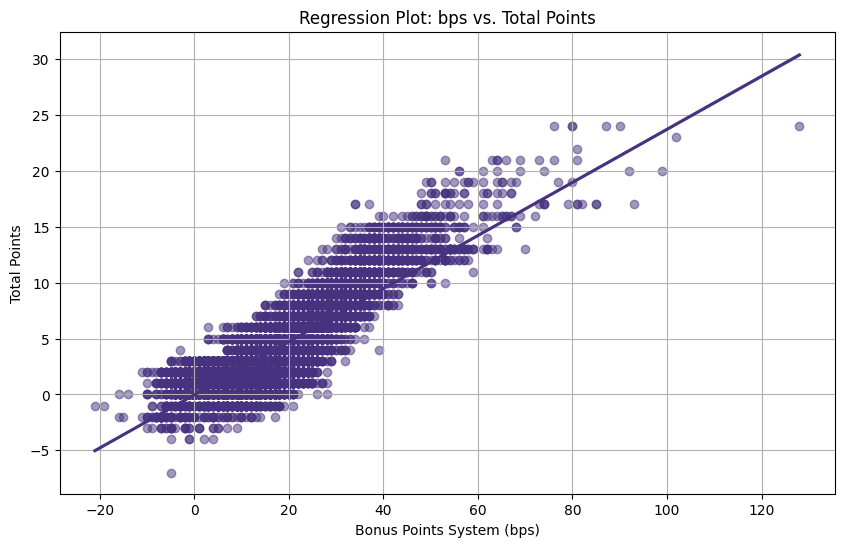

In [22]:
plt.figure(figsize=(10, 6))
sns.regplot(x='bps', y='total_points', data=df, scatter_kws={'alpha':0.5})
plt.xlabel('Bonus Points System (bps)')
plt.ylabel('Total Points')
plt.title('Regression Plot: bps vs. Total Points')
plt.grid(True)
plt.show()

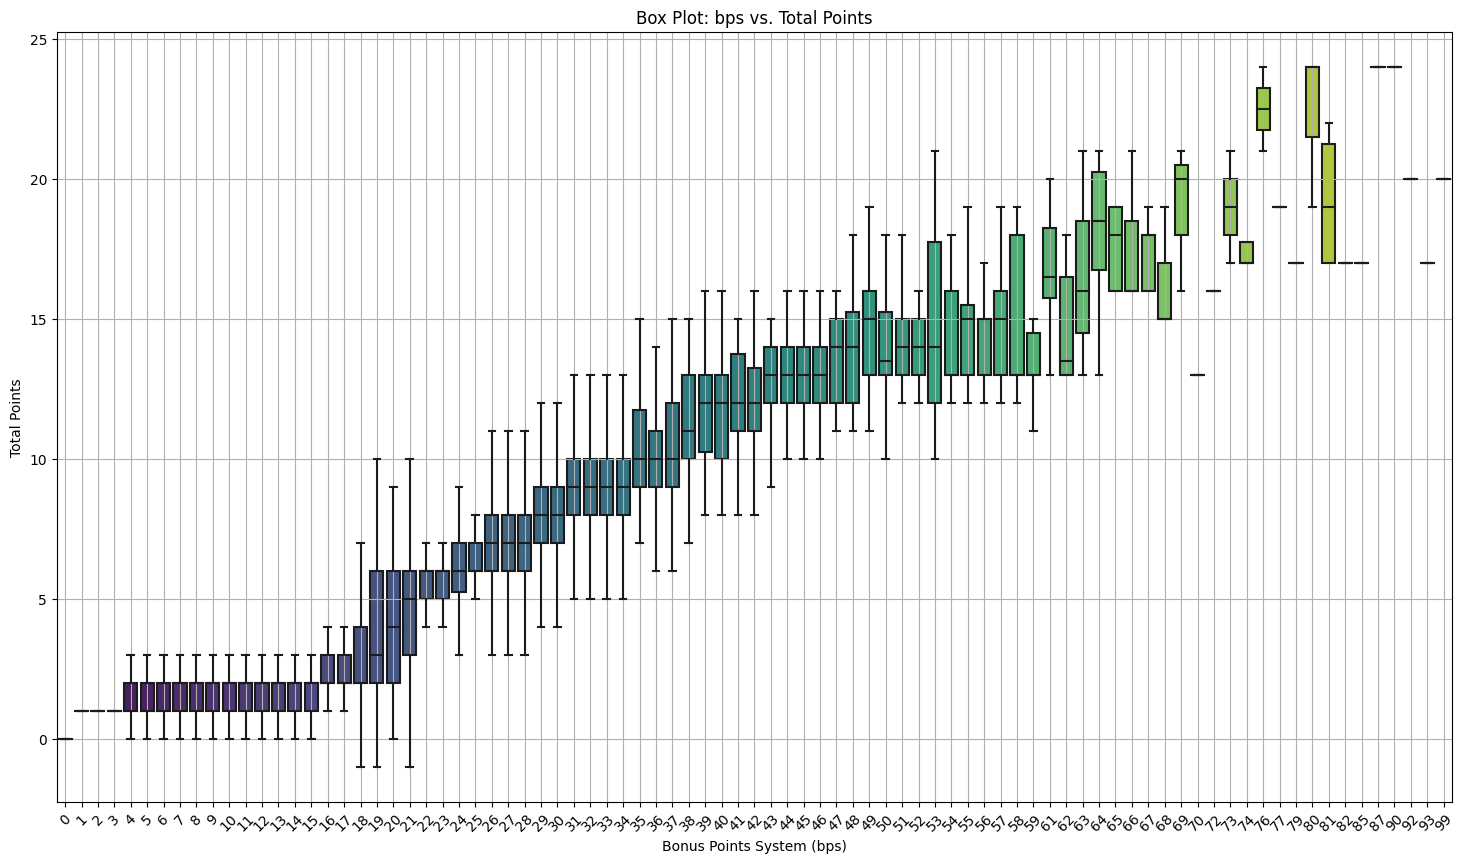

In [23]:
plt.figure(figsize=(18, 10))
df_box = df[(df['bps'] >= 0) & (df['bps'] <= 100)]
sns.boxplot(x='bps', y='total_points', data=df_box, showfliers=False,palette='viridis')
plt.xlabel('Bonus Points System (bps)')
plt.ylabel('Total Points')
plt.title('Box Plot: bps vs. Total Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

**Now ,To Avoid these Positions Based on the RED CARD**

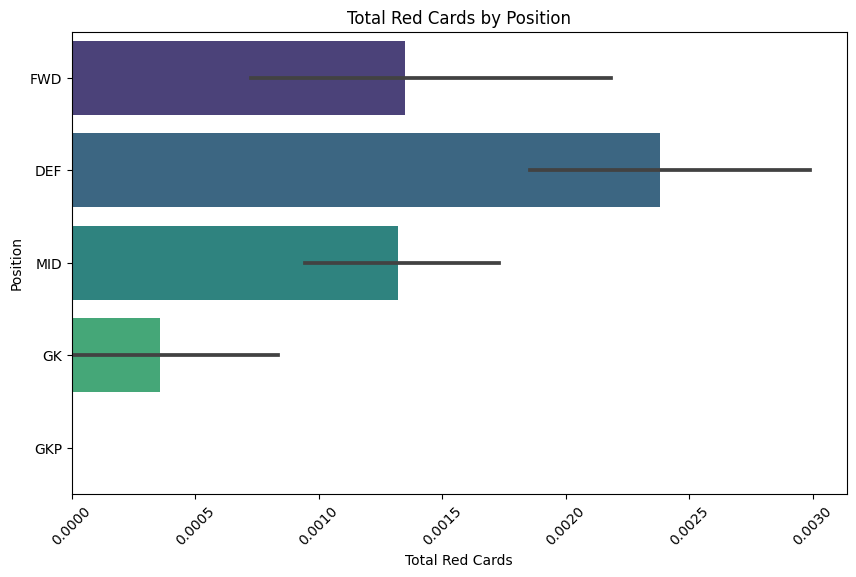

In [24]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df,x='red_cards', y='position', palette='viridis')
plt.xlabel('Total Red Cards')
plt.ylabel('Position')
plt.title('Total Red Cards by Position')
plt.xticks(rotation=45)
plt.show()